In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib notebook

In [105]:
data1 = pd.read_csv('../data/ex1data1.txt', header=None)
data1.columns = ['population', 'profit']
data1.head()
# data1.describe()
# data1.dtypes

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# 2.1 Plotting the Data

Text(0, 0.5, 'Profit in $10,000s')

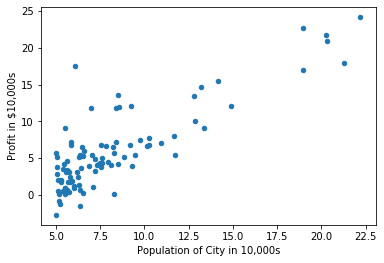

In [106]:
data1.plot(kind='scatter', x='population', y='profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

# 2.2 Gradient Descent

In [107]:
def getData(data):
    """
    get data from datafram, last column is the prediction.
    adds column of ones to X, as first column
    return: X.shape (data_points, features)
            y.shape (data_points, 1)
    """
    X = np.append(np.ones([data.shape[0],1]),data.iloc[:, :-1], axis=1)
    y = np.expand_dims(data.iloc[:, -1].values, axis=1)
    return X, y

In [108]:
def computeCost(X, y, theta):
    J = (((X.dot(theta)-y)**2).sum())/(2*len(y))
    return J

In [150]:
def gradientDescent(X, y, init_theta, alpha, iterations):
    theta = init_theta
    new_theta = init_theta # value not used
    for itr in range(iterations):
        print("%.2f" % computeCost(X, y, theta))
        for j in range(len(theta)):  
            new_theta[j] = theta[j] - (alpha/len(y))*(X.dot(theta)-y).T.dot(X[:,j])
        theta = new_theta
    return theta

In [151]:
X,y = getData(data1)
init_theta = np.zeros([2,1])
alpha = 0.01
iterations = 1500

theta = gradientDescent(X, y, init_theta, alpha, iterations)

32.07
6.79
5.93
5.90
5.90
5.89
5.89
5.88
5.88
5.87
5.86
5.86
5.85
5.85
5.84
5.84
5.83
5.83
5.83
5.82
5.82
5.81
5.81
5.80
5.80
5.79
5.79
5.78
5.78
5.77
5.77
5.76
5.76
5.75
5.75
5.74
5.74
5.74
5.73
5.73
5.72
5.72
5.71
5.71
5.70
5.70
5.69
5.69
5.69
5.68
5.68
5.67
5.67
5.66
5.66
5.66
5.65
5.65
5.64
5.64
5.63
5.63
5.63
5.62
5.62
5.61
5.61
5.60
5.60
5.60
5.59
5.59
5.58
5.58
5.58
5.57
5.57
5.56
5.56
5.56
5.55
5.55
5.55
5.54
5.54
5.53
5.53
5.53
5.52
5.52
5.51
5.51
5.51
5.50
5.50
5.50
5.49
5.49
5.48
5.48
5.48
5.47
5.47
5.47
5.46
5.46
5.46
5.45
5.45
5.45
5.44
5.44
5.43
5.43
5.43
5.42
5.42
5.42
5.41
5.41
5.41
5.40
5.40
5.40
5.39
5.39
5.39
5.38
5.38
5.38
5.37
5.37
5.37
5.36
5.36
5.36
5.35
5.35
5.35
5.35
5.34
5.34
5.34
5.33
5.33
5.33
5.32
5.32
5.32
5.31
5.31
5.31
5.30
5.30
5.30
5.30
5.29
5.29
5.29
5.28
5.28
5.28
5.28
5.27
5.27
5.27
5.26
5.26
5.26
5.26
5.25
5.25
5.25
5.24
5.24
5.24
5.24
5.23
5.23
5.23
5.22
5.22
5.22
5.22
5.21
5.21
5.21
5.21
5.20
5.20
5.20
5.20
5.19
5.19
5.19
5.19
5.18
5.18
5.18
5.17

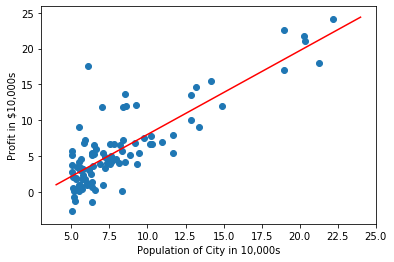

In [152]:
x_range = np.linspace(4,24)
pred = theta[0] + theta[1]*x_range


plt.plot(x_range, pred, c='r')
plt.scatter(x='population', y='profit', data=data1)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

# 2.4 Visualizing J(θ)

In [187]:
X,y = getData(data1)

T0 = np.linspace(-10, 10, 500)
T1 = np.linspace(-1, 4, 500)

J = np.zeros([len(T0), len(T1)])

for i, t0 in enumerate(T0):
    for j, t1 in enumerate(T1):
        theta = np.array([[t0],
                          [t1]])
        J[i,j] = computeCost(X, y, theta)

meshT0,meshT1  = np.meshgrid(T0,T1)

<IPython.core.display.Javascript object>


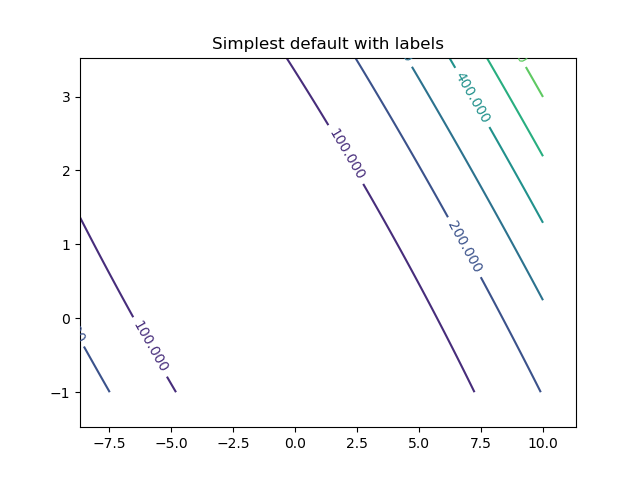

Text(0.5, 1.0, 'Simplest default with labels')

In [193]:
fig, ax = plt.subplots()
CS = ax.contour(meshT0, meshT1, J)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

<IPython.core.display.Javascript object>


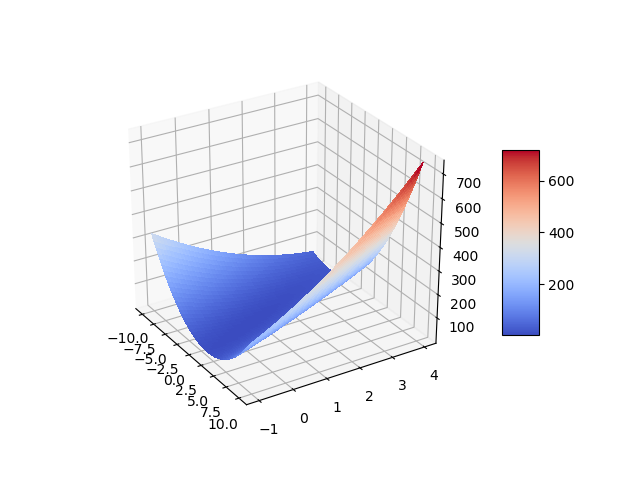

In [191]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(meshT0, meshT1, J, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()